# Support Vector Machines

In this section of the assignment, you will get to implement Support Vector Machines which are among the best (and many believe are indeed the best)“off-the-shelf” supervised learning algorithm.

This section is further divided into 3 subsections.


*   In the first subsection, you will work on a synthetic dataset and visualize the boundary predicted by SVM. You will also vary the value of C-parameter and see how the decision boundary changes. **Please note that you cannot use inbuilt sklearn function for SVM in this sub-section**. You can only use a QCQP (Quadratically Constrained Quadratic Program) solver like CVXPY. 

  References which you may find helpful for this subsection: 
  
  1.   https://www.cvxpy.org/
  2.   https://www.cvxpy.org/examples/basic/quadratic_program.html

  Note that in this section you are expected to show how you derived the Quadratically Constrained form(which can be passed into the solver) from the basic principles of SVM algorithm
*  In the next subsection you will use be using the famous MNIST dataset to explore various kernels and report the results. **Please note you may use inbuilt sklearn SVM functions in this subsection**


In [ ]:
!pip install numpy
!pip install matplotlib
!pip install cvxpy
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

### Subsection 1

In [ ]:
# Feel free to use this helper function to visualize 2D points X with labels +1 or -1
def plot_points(X, Y):
    reds = []
    blues = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')

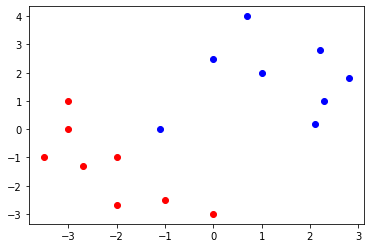

In [ ]:
# Create Synthetic Data and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])

plot_points(X, y)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

In the next cell you are required to derive the Quadratic Constrained Quadratic form of SVM **without soft constraints** from the basic principles. Start with the idea that SVM tries to maximize the margin and then derive the form which you can feed to the solver.

Please print the values of w, b. 

**Note: You are also required to upload a page of the derivation. You may also type it in markdown here**

**Note: You cannot use sklearn SVM functions here**

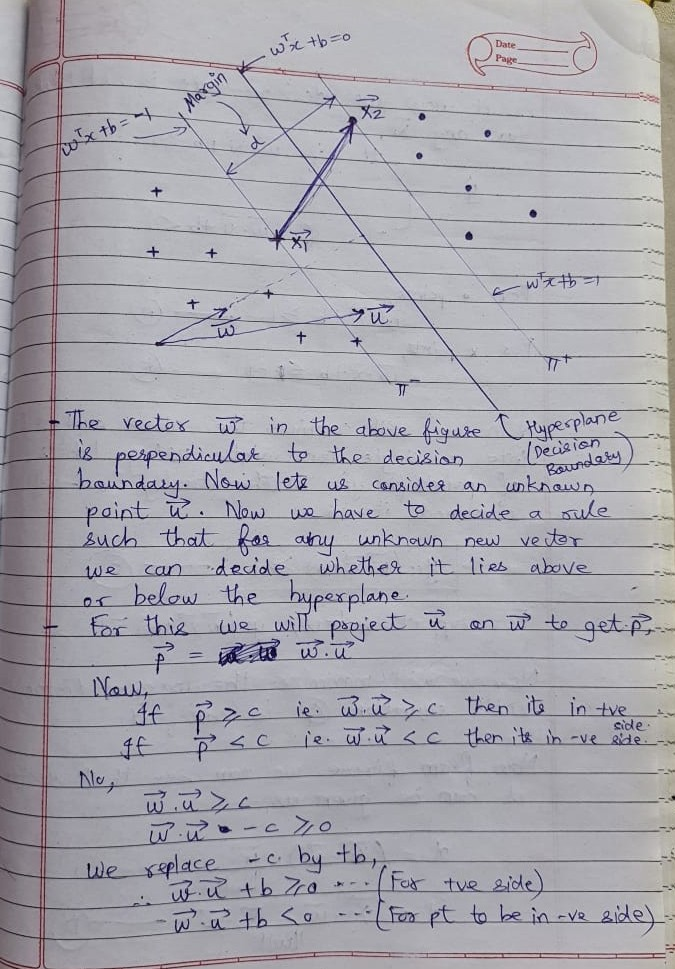

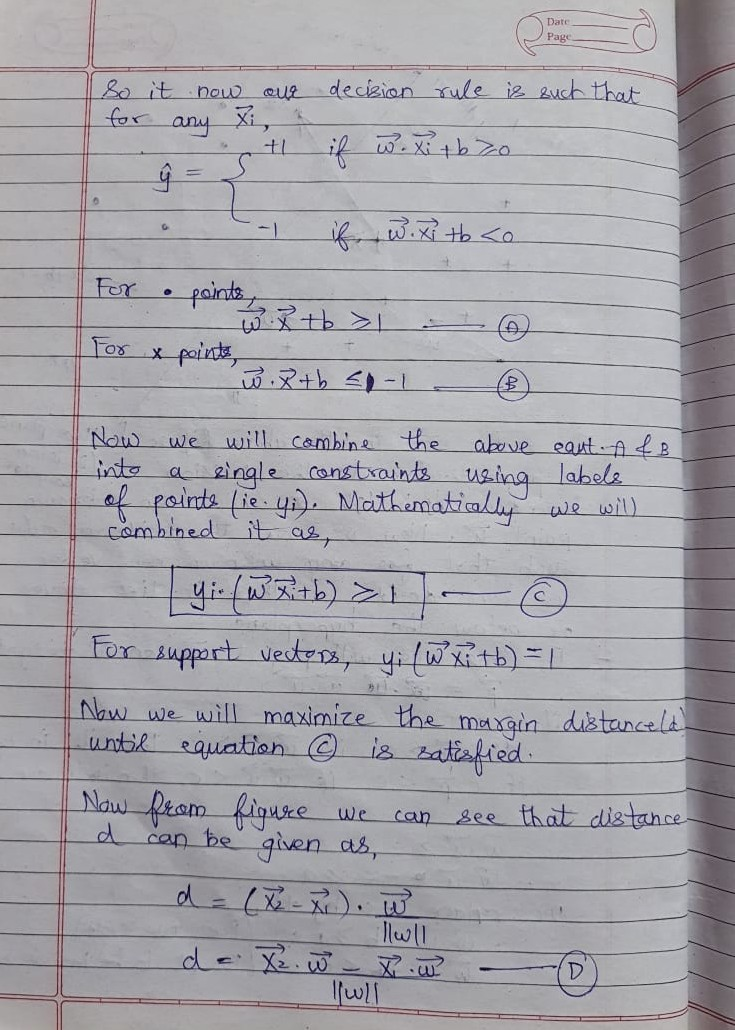

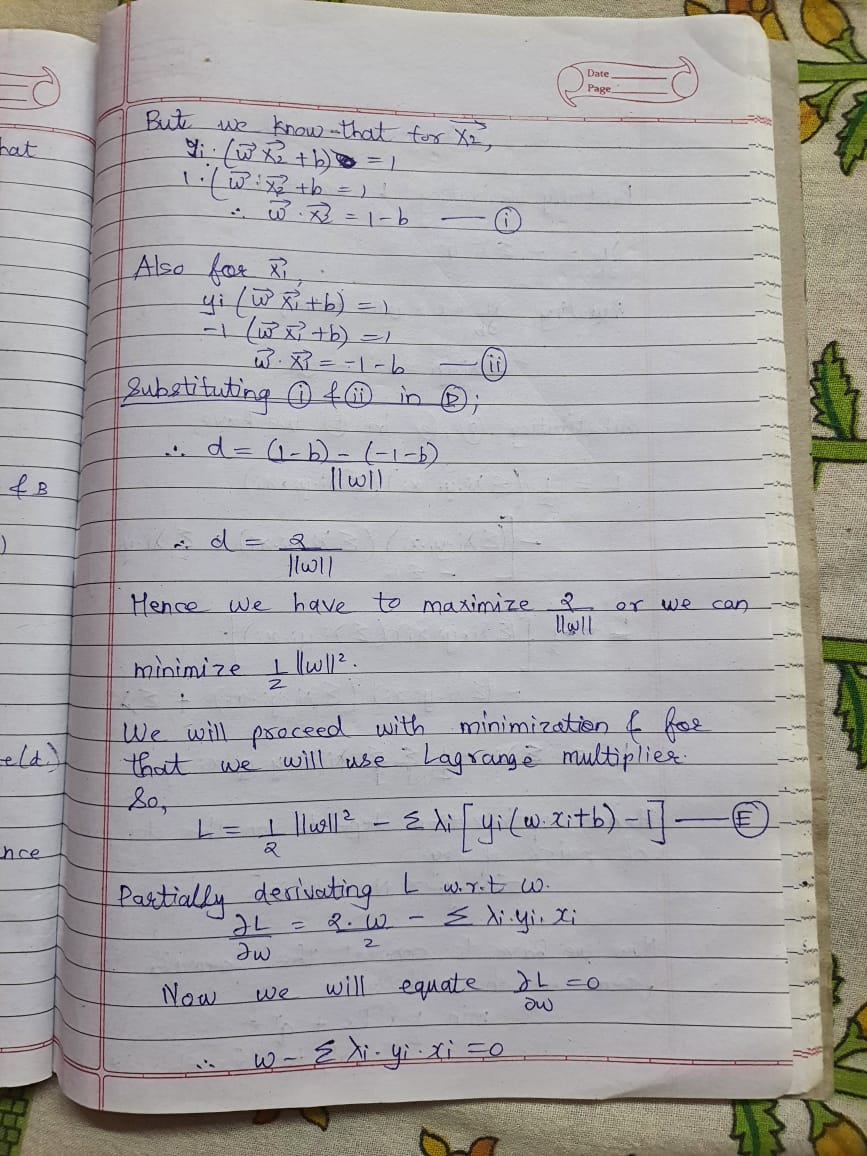

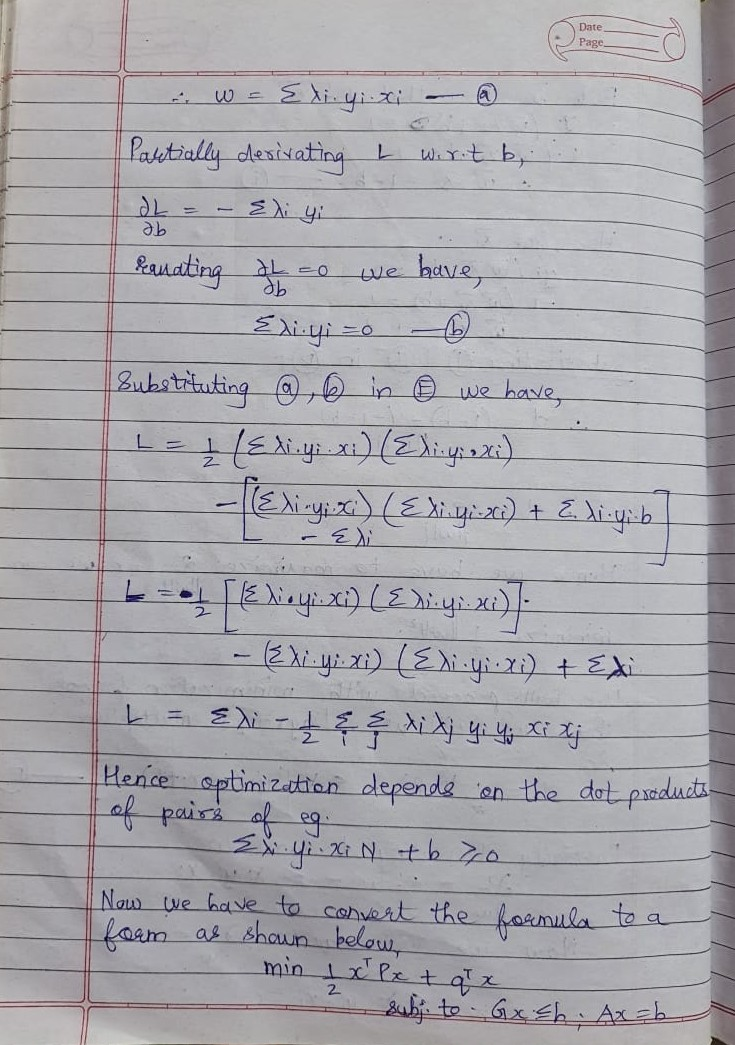

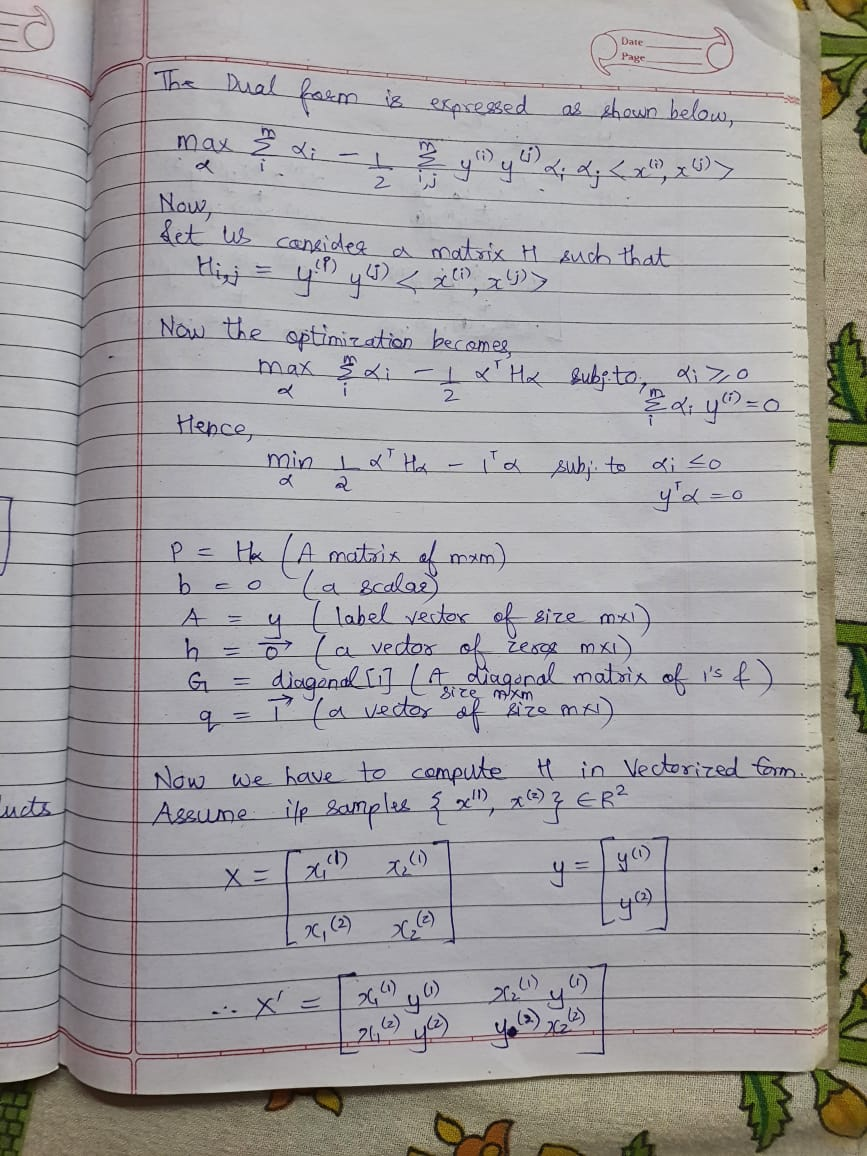

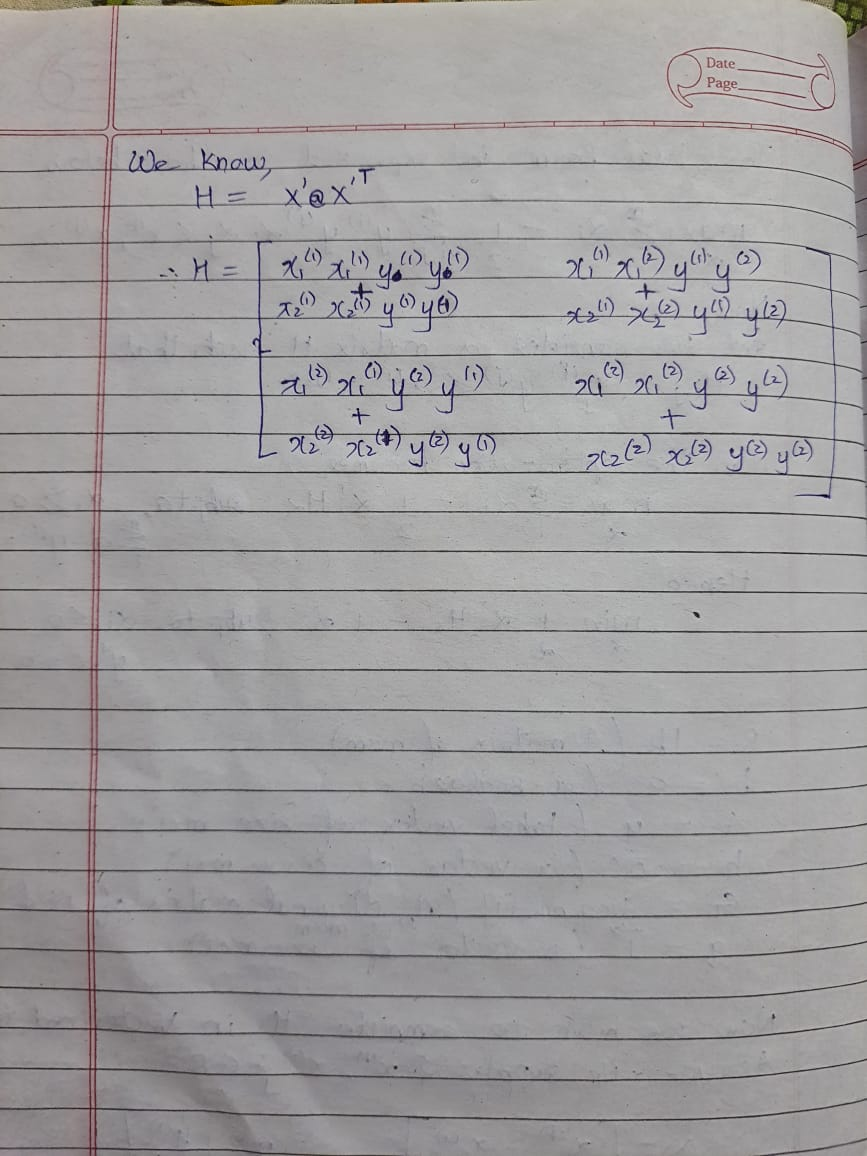

In [ ]:
# Write your code here
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

def SVM(X, y):
  m = X.shape[0]
  n = X.shape[1]

  y = y.reshape(-1,1)
  y *=  1

  X_dash = y * X
  H = np.dot(X_dash , X_dash.T) 
  H *= 1

  forH = np.zeros(m)
  forB = np.zeros(1)
  forG = -np.identity(m)
  forq = -np.ones((m, 1))
  forA = y.reshape(1, -1)

  #Converting into cvxopt format
  P = cvxopt_matrix(H)
  q = cvxopt_matrix(forq)
  G = cvxopt_matrix(forG)
  h = cvxopt_matrix(forH)
  A = cvxopt_matrix(forA)*1.0
  b = cvxopt_matrix(forB)

  #Run solver
  sol = cvxopt_solvers.qp(P, q, G, h, A, b)
  alphas = np.array(sol['x'])

  w = ((y * alphas).T @ X)
  w = w.reshape((w.shape[0]*w.shape[1], 1))

  S = (alphas > 1e-4).reshape(-1)
  b = y[S] - np.dot(X[S], w)

  #Display results
  print('Alphas = ',alphas[alphas > 1e-4])
  print('w = ', w.reshape(-1))
  print('b = ', b[0])
  return w, b

In [ ]:
W, B = SVM(X, y)

     pcost       dcost       gap    pres   dres
 0: -2.6318e+00 -6.0942e+00  5e+01  5e+00  2e+00
 1: -1.2039e+01 -1.0290e+01  1e+01  2e+00  8e-01
 2: -7.2285e+00 -4.5093e+00  8e+00  8e-01  3e-01
 3: -1.9824e+00 -2.6244e+00  8e-01  1e-02  4e-03
 4: -2.3553e+00 -2.3656e+00  1e-02  2e-04  7e-05
 5: -2.3629e+00 -2.3630e+00  1e-04  2e-06  7e-07
 6: -2.3629e+00 -2.3629e+00  1e-06  2e-08  7e-09
Optimal solution found.
Alphas =  [1.44612457 0.91682409 2.36294861]
w =  [-1.73913051 -1.3043479 ]
b =  [-2.91304364]


In the next cell you are required to visualize the boundary predicted by the solver. You may want to revise up on how to plot the a line given w, b. Please plot w vector as well as the margin lines

You may want to create a function to plot the line of separation as you would require this frequently in the subsequent parts of the assignment.

In [ ]:
# Write your code here
# Feel free to use this helper function to visualize 2D points X with labels +1 or -1
def plot_points(X, Y, W, b):
    reds = []
    blues = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')
    marginDistance =2/np.sqrt(((W[1])**2) + ((W[0])**2))
    slope = -(W[0]/W[1])
    y_intercept = -(b/W[1])
    xPlot = np.arange(-5.0, 5.0)
    yPlot = slope*xPlot + y_intercept
    yPlotpositive = slope*xPlot + y_intercept + marginDistance/2
    yPlotnegative = slope*xPlot + y_intercept - marginDistance/2
    plt.plot(xPlot,yPlot, color="black")
    plt.plot(xPlot,yPlotnegative,':g', linestyle='dashed')
    plt.plot(xPlot,yPlotpositive,':y', linestyle='dashed')

In the next cell please plot only the support vectors along with the boundary, w vector, and margins. 

**Note: You are not supposed to hard-code the points here**

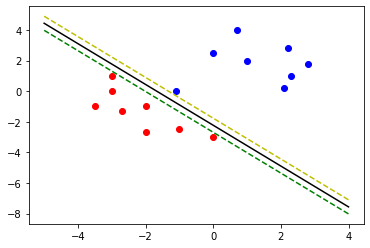

In [ ]:
# Write your code here
plot_points(X,y,W,B[0])

In the next cell add the following points:
* (-4, -10) with label 1
* (4, 4) with label -1

Is the decision boundary changed after adding the points? Explain your observations theoretically.

> **No, the decision boundary didn't changed after adding the points[ i.e (-4, -10) and (4, 4) ] as those two points were added to their respective classes and the model was still linearly seperable. Also those two added points were away from the margin area and hence didn't act as support vectors to modify the decision boundary.** 



In [ ]:
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8],[-4,-10],[4,4]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1])

In [ ]:
# Solve for the decision boundary using this modified dataset
W, B = SVM(X, y)

     pcost       dcost       gap    pres   dres
 0: -5.1118e+00 -1.1301e+01  7e+01  8e+00  2e+00
 1: -1.3664e+01 -1.4490e+01  3e+01  4e+00  1e+00
 2: -2.0689e+01 -1.2752e+01  2e+01  2e+00  5e-01
 3: -4.3773e+00 -3.2950e+00  9e+00  4e-01  1e-01
 4: -2.1753e+00 -2.4873e+00  3e-01  5e-16  3e-15
 5: -2.3607e+00 -2.3642e+00  3e-03  5e-16  2e-15
 6: -2.3629e+00 -2.3630e+00  3e-05  5e-16  3e-15
 7: -2.3629e+00 -2.3629e+00  3e-07  4e-16  2e-15
Optimal solution found.
Alphas =  [1.44612473 0.91682416 2.36294889]
w =  [-1.73913048 -1.30434785]
b =  [-2.9130436]


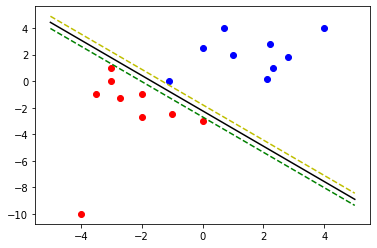

In [ ]:
plot_points(X,y,W,B[0])

In the next cell you are required to modify your framing of optimisation problem to incorporate soft constraints also known as slack. Plot the decision boundary, w and margin lines for various values of C: $0.01$, $0.1$, $3$, $10$, $100$.

Explain your results theoretically. How does the boundary change with varying values of C? Why?

**Note: Use the modified X and y i.e after adding points in previous cell**

> **The C parameter tells the SVM optimization how much you wouldn't want each training example to be misclassified. For large values of C, the optimization would select a smaller-margin hyperplane if it does a better job of correctly classifying all of the training points. A very small value of C, on the other hand, would cause the optimizer to search for a larger-margin separating hyperplane, even though it misclassifies more points. Even if your training data is linearly separable, you can get misclassified examples for very small values of C.**



In [ ]:
# Write your code here
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

def SVM(X, y, C):
  m = X.shape[0]
  n = X.shape[1]

  y = y.reshape(-1,1)
  y *=  1

  X_dash = y * X
  H = np.dot(X_dash , X_dash.T) 
  H *= 1

  forH = np.hstack((np.zeros(m), np.ones(m) * C))
  forB = np.zeros(1)
  forG = np.vstack((np.identity(m)*-1, np.identity(m)))
  forq = -np.ones((m, 1)) 
  forA = y.reshape(1, -1)

  #Converting into cvxopt format
  P = cvxopt_matrix(H)
  q = cvxopt_matrix(forq)
  G = cvxopt_matrix(forG)
  h = cvxopt_matrix(forH)
  A = cvxopt_matrix(forA)*1.0
  b = cvxopt_matrix(forB)

  #Run solver
  sol = cvxopt_solvers.qp(P, q, G, h, A, b)
  alphas = np.array(sol['x'])


  w = ((y * alphas).T @ X)
  w = w.reshape((w.shape[0]*w.shape[1], 1))

  S = (alphas > 1e-4).reshape(-1)
  b = y[S] - np.dot(X[S], w)

  #Display results
  print('Alphas = ',alphas[alphas > 1e-4])
  print('w = ', w.reshape(-1))
  print('b = ', b[0])
  return w, b

     pcost       dcost       gap    pres   dres
 0: -2.6026e+00 -3.5361e-01  9e+01  1e+01  2e-15
 1: -1.2076e-01 -3.5017e-01  2e+00  1e-01  2e-15
 2: -7.6571e-02 -2.5938e-01  2e-01  2e-17  3e-16
 3: -8.5515e-02 -1.0718e-01  2e-02  7e-18  2e-16
 4: -9.3127e-02 -9.6086e-02  3e-03  8e-18  1e-16
 5: -9.4765e-02 -9.5225e-02  5e-04  9e-18  2e-16
 6: -9.4945e-02 -9.4962e-02  2e-05  9e-18  2e-16
 7: -9.4953e-02 -9.4953e-02  2e-07  8e-18  2e-16
 8: -9.4953e-02 -9.4953e-02  2e-09  8e-18  3e-16
Optimal solution found.
Alphas =  [0.00671205 0.01       0.01       0.01       0.01       0.00328794
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.00999999]
w =  [-0.22506802 -0.19858947]
b =  [0.01367246]


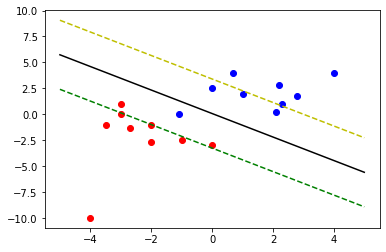

In [ ]:
# Write your code here for C= 0.01
W, B = SVM(X, y, 0.01)
plot_points(X,y,W,B[0])

     pcost       dcost       gap    pres   dres
 0: -2.8305e+00 -3.1272e+00  9e+01  9e+00  2e-15
 1: -5.6185e-01 -2.8854e+00  7e+00  5e-01  2e-15
 2: -1.8369e-01 -1.4329e+00  1e+00  3e-02  1e-15
 3: -2.4621e-01 -4.0857e-01  2e-01  3e-03  4e-16
 4: -2.9106e-01 -3.3155e-01  4e-02  6e-04  5e-16
 5: -3.0175e-01 -3.0939e-01  8e-03  1e-04  5e-16
 6: -3.0399e-01 -3.0541e-01  1e-03  2e-05  6e-16
 7: -3.0455e-01 -3.0457e-01  2e-05  2e-07  4e-16
 8: -3.0455e-01 -3.0456e-01  2e-07  2e-09  3e-16
Optimal solution found.
Alphas =  [0.09999999 0.02020318 0.09999989 0.1        0.04661771 0.07358562]
w =  [-0.38493714 -0.35146454]
b =  [0.19665312]


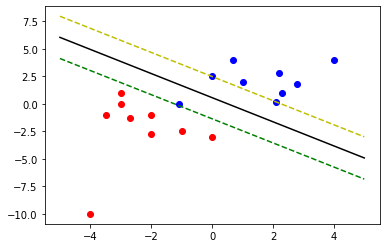

In [ ]:
# Write your code here for C= 0.1
W, B = SVM(X, y, 0.1)
plot_points(X,y,W,B[0])

     pcost       dcost       gap    pres   dres
 0: -9.8203e+00 -1.7049e+02  5e+02  1e+00  9e-15
 1: -4.0656e+00 -6.5544e+01  9e+01  1e-01  8e-15
 2: -2.5363e+00 -1.5179e+01  2e+01  2e-02  5e-15
 3: -1.9374e+00 -4.1091e+00  3e+00  3e-03  3e-15
 4: -2.3455e+00 -2.4598e+00  1e-01  1e-04  2e-15
 5: -2.3628e+00 -2.3639e+00  1e-03  1e-06  2e-15
 6: -2.3629e+00 -2.3630e+00  1e-05  1e-08  3e-15
 7: -2.3629e+00 -2.3629e+00  1e-07  1e-10  2e-15
Optimal solution found.
Alphas =  [1.44612475 0.91682419 2.36294895]
w =  [-1.73913043 -1.30434782]
b =  [-2.91304347]


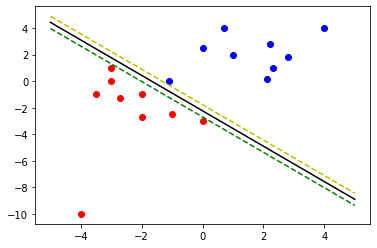

In [ ]:
# Write your code here for C= 3
W, B = SVM(X, y, 3)
plot_points(X,y,W,B[0])

     pcost       dcost       gap    pres   dres
 0: -2.3870e+01 -1.2468e+03  3e+03  7e-01  2e-14
 1: -2.1107e+00 -4.3739e+02  7e+02  1e-01  2e-14
 2:  1.8660e+00 -7.1407e+01  1e+02  2e-02  1e-14
 3:  2.2865e+00 -1.4223e+01  2e+01  4e-16  1e-14
 4: -1.1166e+00 -3.1550e+00  2e+00  1e-15  3e-15
 5: -2.2967e+00 -2.5360e+00  2e-01  3e-16  3e-15
 6: -2.3623e+00 -2.3647e+00  2e-03  3e-16  4e-15
 7: -2.3629e+00 -2.3630e+00  2e-05  6e-16  3e-15
 8: -2.3629e+00 -2.3629e+00  2e-07  2e-16  2e-15
Optimal solution found.
Alphas =  [1.44612475 0.91682419 2.36294895]
w =  [-1.73913045 -1.30434784]
b =  [-2.91304352]


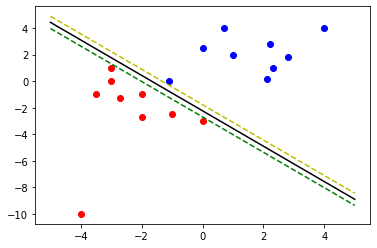

In [ ]:
# Write your code here for C= 10
W, B = SVM(X, y, 10)
plot_points(X,y,W,B[0])

     pcost       dcost       gap    pres   dres
 0:  1.5101e+02 -9.9716e+04  2e+05  6e-01  2e-13
 1:  9.3916e+02 -3.3387e+04  5e+04  1e-01  3e-13
 2:  9.9369e+02 -6.8221e+03  1e+04  2e-02  2e-13
 3:  4.2180e+02 -8.9811e+02  1e+03  1e-15  2e-13
 4:  6.0363e+01 -8.4259e+01  1e+02  5e-15  3e-14
 5:  6.6556e+00 -1.3117e+01  2e+01  8e-16  9e-15
 6: -5.5520e-01 -2.9306e+00  2e+00  3e-16  4e-15
 7: -2.2449e+00 -2.5867e+00  3e-01  5e-16  3e-15
 8: -2.3616e+00 -2.3653e+00  4e-03  2e-16  4e-15
 9: -2.3629e+00 -2.3630e+00  4e-05  5e-16  3e-15
10: -2.3629e+00 -2.3629e+00  4e-07  1e-15  3e-15
Optimal solution found.
Alphas =  [1.44612473 0.91682418 2.36294892]
w =  [-1.73913046 -1.30434786]
b =  [-2.91304353]


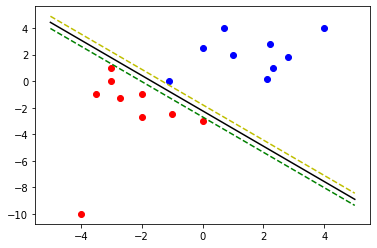

In [ ]:
# Write your code here for C= 100
W, B = SVM(X, y, 100)
plot_points(X,y,W,B[0])

Take the case of C = 100 and remove the support vectors. Does the boundary change after the deletion?
Explain why? Show your results by appropriate plots?

> **Yes, the margin distance increases slightly because the support vectors [ which were considered to draw the decision boundary ] were removed and hence to find new support vectors the margin distance increases.**


**Finding Support Vectors**

In [ ]:
# Finding index of Support Vectors in X
positionOfSupportVectorsinX = list()
for ind in range(0, len(y)):
  xCord = X[ind][0]
  yCord = X[ind][1]
  diff = 999
  if (y[ind] == 1):
    diff = ((((-B - (W[0]*xCord)+1)/W[1])[0] - yCord)**2)**0.5
  else:
    diff = ((((-B - (W[0]*xCord)-1)/W[1])[0] - yCord)**2)**0.5

  if diff < 0.01:
    positionOfSupportVectorsinX.append(ind)

print("Support Vectors are")
for ind in positionOfSupportVectorsinX:
  print(X[ind])

Support Vectors are
[-3.  1.]
[ 0. -3.]
[-1.1  0. ]


**Removing Support Vectors from X and y**

In [ ]:
newX = list()
newY = list()

for ind in range(len(X)):
  if ind not in positionOfSupportVectorsinX:
    newX.append(X[ind])
    newY.append(y[ind])

newX = np.array(newX)
newY = np.array(newY)
X = newX
y = newY

**Case of C = 100 after removing support vectors**

In [ ]:
# Write your code here for C= 100 after removing support vectors
W, B = SVM(X, y, 100)

     pcost       dcost       gap    pres   dres
 0:  3.3858e+02 -6.2135e+04  1e+05  4e-01  4e-13
 1:  9.9183e+02 -1.7670e+04  3e+04  7e-02  5e-13
 2:  6.4800e+02 -9.3731e+02  2e+03  1e-03  4e-14
 3:  1.0072e+02 -1.1431e+02  2e+02  5e-16  3e-14
 4:  1.3779e+01 -1.7386e+01  3e+01  3e-16  2e-14
 5:  1.6923e+00 -2.7486e+00  4e+00  2e-16  5e-15
 6:  1.0077e-01 -5.1638e-01  6e-01  2e-16  2e-15
 7: -8.7537e-02 -1.5420e-01  7e-02  2e-16  6e-16
 8: -1.2589e-01 -1.4431e-01  2e-02  1e-16  5e-16
 9: -1.3487e-01 -1.3645e-01  2e-03  2e-16  8e-16
10: -1.3584e-01 -1.3586e-01  2e-05  2e-16  4e-16
11: -1.3585e-01 -1.3585e-01  2e-07  2e-16  3e-16
12: -1.3585e-01 -1.3585e-01  2e-09  2e-16  3e-16
Optimal solution found.
Alphas =  [0.13585196 0.08193134 0.05392062]
w =  [-0.38493724 -0.35146444]
b =  [-0.12133891]


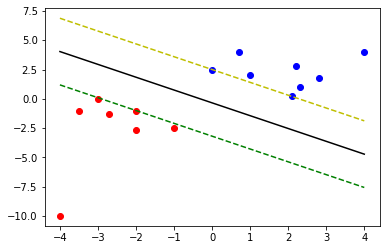

In [ ]:
# Write your code here for C= 100 after removing support vectors
plot_points(X,y,W,B[0])

### Subsection 2

In [ ]:
!pip install python-mnist
!rm -rf samples
!mkdir samples
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P samples/
!gunzip samples/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P samples/
!gunzip samples/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P samples/
!gunzip samples/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P samples/
!gunzip samples/t10k-labels-idx1-ubyte.gz

--2021-03-09 16:08:22--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘samples/train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  46.2MB/s    in 0.2s    

2021-03-09 16:08:23 (46.2 MB/s) - ‘samples/train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2021-03-09 16:08:24--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘samples/train-labels-idx1-ubyte.gz’

train-labe

In [ ]:
# Import Relevant Packages
from sklearn.svm import SVC
import numpy as np
from mnist.loader import MNIST

In [ ]:
mndata = MNIST('samples')

# Load training dataset
images, labels = mndata.load_training()
l = len(labels)
images_train = np.array(images)
labels_train = np.array(labels)

print(images_train.shape)
print(labels_train.shape)

(60000, 784)
(60000,)


In [ ]:
# Load testing dataset
images, labels = mndata.load_testing()
l = len(labels)
images_test = np.array(images)
labels_test = np.array(labels)

print(images_test.shape)
print(labels_test.shape)

(10000, 784)
(10000,)


- Tweak different parameters like the C Parameter and gamma parameter of the Linear SVM and report the results.
- Experiment different kernels for classification and report the results.

Report accuracy score, F1-score, Confusion matrix and any other metrics you feel useful.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def SVM(gammaValue, kernelType, c):
  svmpolynomial = SVC(gamma = gammaValue, kernel = kernelType, C = c, random_state = 45)
  svmpolynomial.fit(images_train,labels_train)
  labels_predict = svmpolynomial.predict(images_test)
  Score = accuracy_score(labels_test,labels_predict)
  Confusion_Matrix = confusion_matrix(labels_test,labels_predict)
  Classifiction_Report = classification_report(labels_test,labels_predict)
  return Score, Confusion_Matrix, Classifiction_Report

 **Polynomial Kernel**

In [ ]:
Score, Confusion_Matrix, Classifiction_Report = SVM(0.02, 'poly', 15)
print("Accuracy Score")
print(Score)
print("Confusion Matrix")
print(Confusion_Matrix)
print("Classifiction Report")
print(Classifiction_Report)

Accuracy Score
0.9836120401337792
Confusion Matrix
[[ 971    3    6]
 [   5  968    9]
 [   2   24 1002]]
Classifiction Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           4       0.97      0.99      0.98       982
           7       0.99      0.97      0.98      1028

    accuracy                           0.98      2990
   macro avg       0.98      0.98      0.98      2990
weighted avg       0.98      0.98      0.98      2990



In [ ]:
Score, Confusion_Matrix, Classifiction_Report = SVM(0.002, 'poly', 5)
print("Accuracy Score")
print(Score)
print("Confusion Matrix")
print(Confusion_Matrix)
print("Classifiction Report")
print(Classifiction_Report)

Accuracy Score
0.9836120401337792
Confusion Matrix
[[ 971    3    6]
 [   5  968    9]
 [   2   24 1002]]
Classifiction Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           4       0.97      0.99      0.98       982
           7       0.99      0.97      0.98      1028

    accuracy                           0.98      2990
   macro avg       0.98      0.98      0.98      2990
weighted avg       0.98      0.98      0.98      2990



In [ ]:
Score, Confusion_Matrix, Classifiction_Report = SVM(0.1, 'poly', 1024)
print("Accuracy Score")
print(Score)
print("Confusion Matrix")
print(Confusion_Matrix)
print("Classifiction Report")
print(Classifiction_Report)

Accuracy Score
0.9836120401337792
Confusion Matrix
[[ 971    3    6]
 [   5  968    9]
 [   2   24 1002]]
Classifiction Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           4       0.97      0.99      0.98       982
           7       0.99      0.97      0.98      1028

    accuracy                           0.98      2990
   macro avg       0.98      0.98      0.98      2990
weighted avg       0.98      0.98      0.98      2990



Reducing Sample Size

In [ ]:
def reduceSize(labels):
  ans = np.empty(labels.shape[0],dtype=bool)
  pos = 0
  for e in labels:
    if e in [0,1,2]:
      ans[pos] = True
    else:
      ans[pos] = False
    
    pos +=1 

  return ans

In [ ]:
train = reduceSize(labels_train)
test = reduceSize(labels_test)

images_train = images_train[train]
labels_train = labels_train[train]
images_test = images_test[test]
labels_test  = labels_test[test]
print(images_train.shape, images_test.shape)

(18623, 784) (3147, 784)


**Linear Kernel**

In [ ]:
Score, Confusion_Matrix, Classifiction_Report = SVM(0.001, 'linear', 2)
print("Accuracy Score")
print(Score)
print("Confusion Matrix")
print(Confusion_Matrix)
print("Classifiction Report")
print(Classifiction_Report)

Accuracy Score
0.9836120401337792
Confusion Matrix
[[ 971    3    6]
 [   5  968    9]
 [   2   24 1002]]
Classifiction Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           4       0.97      0.99      0.98       982
           7       0.99      0.97      0.98      1028

    accuracy                           0.98      2990
   macro avg       0.98      0.98      0.98      2990
weighted avg       0.98      0.98      0.98      2990



In [ ]:
Score, Confusion_Matrix, Classifiction_Report = SVM(0.00000001, 'linear', 128)
print("Accuracy Score")
print(Score)
print("Confusion Matrix")
print(Confusion_Matrix)
print("Classifiction Report")
print(Classifiction_Report)

Accuracy Score
0.9809342230695901
Confusion Matrix
[[ 971    0    9]
 [   1 1127    7]
 [  24   19  989]]
Classifiction Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.96      0.97      1032

    accuracy                           0.98      3147
   macro avg       0.98      0.98      0.98      3147
weighted avg       0.98      0.98      0.98      3147



In [ ]:
Score, Confusion_Matrix, Classifiction_Report = SVM(0.00000001, 'linear', 1024)
print("Accuracy Score")
print(Score)
print("Confusion Matrix")
print(Confusion_Matrix)
print("Classifiction Report")
print(Classifiction_Report)

Accuracy Score
0.9809342230695901
Confusion Matrix
[[ 971    0    9]
 [   1 1127    7]
 [  24   19  989]]
Classifiction Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.96      0.97      1032

    accuracy                           0.98      3147
   macro avg       0.98      0.98      0.98      3147
weighted avg       0.98      0.98      0.98      3147



**Rbf Kernel**

In [ ]:
Score, Confusion_Matrix, Classifiction_Report = SVM(0.00001, 'rbf', 2)
print("Accuracy Score")
print(Score)
print("Confusion Matrix")
print(Confusion_Matrix)
print("Classifiction Report")
print(Classifiction_Report)

Accuracy Score
0.6110581506196378
Confusion Matrix
[[  19    0  961]
 [   0  872  263]
 [   0    0 1032]]
Classifiction Report
              precision    recall  f1-score   support

           0       1.00      0.02      0.04       980
           1       1.00      0.77      0.87      1135
           2       0.46      1.00      0.63      1032

    accuracy                           0.61      3147
   macro avg       0.82      0.60      0.51      3147
weighted avg       0.82      0.61      0.53      3147



In [ ]:
Score, Confusion_Matrix, Classifiction_Report = SVM(0.0000001, 'rbf', 2)
print("Accuracy Score")
print(Score)
print("Confusion Matrix")
print(Confusion_Matrix)
print("Classifiction Report")
print(Classifiction_Report)

Accuracy Score
0.9945980298697172
Confusion Matrix
[[ 978    1    1]
 [   0 1130    5]
 [   7    3 1022]]
Classifiction Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032

    accuracy                           0.99      3147
   macro avg       0.99      0.99      0.99      3147
weighted avg       0.99      0.99      0.99      3147



In [ ]:
Score, Confusion_Matrix, Classifiction_Report = SVM(0.0000001, 'rbf', 2000)
print("Accuracy Score")
print(Score)
print("Confusion Matrix")
print(Confusion_Matrix)
print("Classifiction Report")
print(Classifiction_Report)

Accuracy Score
0.9958690816650778
Confusion Matrix
[[ 977    1    2]
 [   1 1131    3]
 [   4    2 1026]]
Classifiction Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032

    accuracy                           1.00      3147
   macro avg       1.00      1.00      1.00      3147
weighted avg       1.00      1.00      1.00      3147



**Sigmoid Kernel**

In [ ]:
Score, Confusion_Matrix, Classifiction_Report = SVM(0.000001, 'sigmoid', 100)
print("Accuracy Score")
print(Score)
print("Confusion Matrix")
print(Confusion_Matrix)
print("Classifiction Report")
print(Classifiction_Report)

Accuracy Score
0.5436924054655227
Confusion Matrix
[[580 140 260]
 [  3 684 448]
 [ 54 531 447]]
Classifiction Report
              precision    recall  f1-score   support

           0       0.91      0.59      0.72       980
           1       0.50      0.60      0.55      1135
           2       0.39      0.43      0.41      1032

    accuracy                           0.54      3147
   macro avg       0.60      0.54      0.56      3147
weighted avg       0.59      0.54      0.56      3147



In [ ]:
Score, Confusion_Matrix, Classifiction_Report = SVM(0.000001, 'sigmoid', 1)
print("Accuracy Score")
print(Score)
print("Confusion Matrix")
print(Confusion_Matrix)
print("Classifiction Report")
print(Classifiction_Report)

Accuracy Score
0.544327931363203
Confusion Matrix
[[582 140 258]
 [  3 684 448]
 [ 54 531 447]]
Classifiction Report
              precision    recall  f1-score   support

           0       0.91      0.59      0.72       980
           1       0.50      0.60      0.55      1135
           2       0.39      0.43      0.41      1032

    accuracy                           0.54      3147
   macro avg       0.60      0.54      0.56      3147
weighted avg       0.59      0.54      0.56      3147



In [ ]:
Score, Confusion_Matrix, Classifiction_Report = SVM(0.00000001, 'sigmoid', 1)
print("Accuracy Score")
print(Score)
print("Confusion Matrix")
print(Confusion_Matrix)
print("Classifiction Report")
print(Classifiction_Report)

Accuracy Score
0.9895138226882746
Confusion Matrix
[[ 976    2    2]
 [   0 1125   10]
 [  13    6 1013]]
Classifiction Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032

    accuracy                           0.99      3147
   macro avg       0.99      0.99      0.99      3147
weighted avg       0.99      0.99      0.99      3147



**Accuracy Score Comparison of Different kernels**

> **For Polynomial kernel**

1.  Gamma = 0.02 , C = 15  ----->  Accuracy =  **0.983**
2.  Gamma = 0.002 , C = 5  ----->  Accuracy =  **0.983**
3.  Gamma = 0.1 , C = 1024  ----->  Accuracy =  **0.983**



> **For Linear kernel**

1.  Gamma = 0.001 , C = 2  ----->  Accuracy =  **0.983**
2.  Gamma = 0.00000001 , C = 128  ----->  Accuracy =  **0.981**
3.  Gamma = 0.00000001 , C = 1024  ----->  Accuracy =  **0.981**


> **For rbk kernel**

1.  Gamma = 0.00001 , C = 2  ----->  Accuracy =  **0.611**
2.  Gamma = 0.0000001 , C = 2  ----->  Accuracy =  **0.994**
3.  Gamma = 0.0000001 , C = 2000  ----->  Accuracy =  **0.995**


> **For Sigmoid kernel**

1.  Gamma = 0.000001 , C = 100  ----->  Accuracy =  **0.543**
2.  Gamma = 0.000001 , C = 1  ----->  Accuracy =  **0.544**
3.  Gamma = 0.00000001 , C = 1  ----->  Accuracy =  **0.989**







